In [70]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import pandas
import csv
import math 
from sklearn.preprocessing import OneHotEncoder

In [71]:
with open('data/netflix_titles.csv',encoding = "utf-8") as f:
    reader = csv.reader(f)
    data=next(reader)[1:-1]
    del data[1]
    del data[2]
    del data[3]
    data=[data]
    for row in reader:
        if "Season" in row[-3]:
            continue
        r=row[1:-1]
        del r[1]
        del r[2]
        del r[3]
        r[-2]=int(r[-2].replace('min',''))
        data.append(r)
    #print(data)

In [72]:
with open('netflix.csv', 'w', encoding="utf-8") as f:
    writer = csv.writer(f)
    for row in data:
        writer.writerow(row)

In [73]:
netflix = pandas.read_csv('netflix.csv')
netflix.head(10)

,type,director,country,release_year,rating,duration,listed_in
0,Movie,"Richard Finn, Tim Maltby","United States, India, South Korea, China",2019,TV-PG,90,"Children & Family Movies, Comedies"
1,Movie,NaN,United Kingdom,2016,TV-MA,94,Stand-Up Comedy
2,Movie,Fernando Lebrija,United States,2017,TV-14,99,Comedies
3,Movie,Gabe Ibáñez,"Bulgaria, United States, Spain, Canada",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers"
4,Movie,"Rodrigo Toro, Francisco Schultz",Chile,2017,TV-MA,60,Stand-Up Comedy
5,Movie,Henrik Ruben Genz,"United States, United Kingdom, Denmark, Sweden",2014,R,90,"Action & Adventure, Thrillers"
6,Movie,José Miguel Contreras,NaN,2017,TV-MA,78,Stand-Up Comedy
7,Movie,Daniel Alfredson,"Netherlands, Belgium, United Kingdom, United S...",2015,R,95,"Action & Adventure, Dramas, International Movies"
8,Movie,NaN,NaN,2009,TV-Y7,58,Children & Family Movies
9,Movie,"Munjal Shroff, Tilak Shetty",NaN,2013,TV-Y7,62,Children & Family Movies


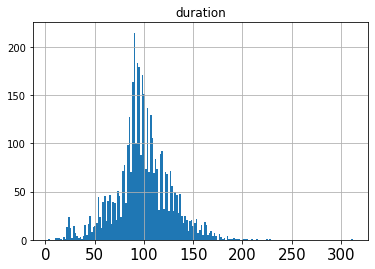

In [13]:
length = len(netflix["duration"].unique())
netflix.hist(column="duration",bins=length, xlabelsize=15)
plt.show()

In [14]:
netflix = netflix[netflix["duration"] < 250]

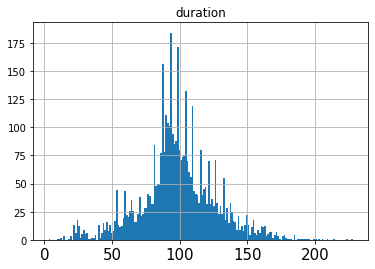

In [15]:
length = len(netflix["duration"].unique())
netflix.hist(column="duration",bins=length, xlabelsize=15)
plt.show()

In [16]:
#encode and bind
def eab(original_dataframe, feature_to_encode):
    dummies = pandas.get_dummies(original_dataframe[[feature_to_encode]])
    res = pandas.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [17]:
features_to_encode = ['type','rating']
for feature in features_to_encode:
    netflix=eab(netflix, feature)

In [74]:
def feature_collect(netflix,column):
    y=netflix[column].str.split(",")
    feat=set()
    for x in y.values:
        if not isinstance(x,list):
            feat.add(x)
            continue
        for val in x:
            feat.add(val)
    return feat

In [75]:
def feat_encode(df,column):
    features=feature_collect(df,column)
    feat={}
    for i,f in enumerate(features):
        feat[f]=i
    one_hot=[]
    for names in df[column]:
        if isinstance(names,float):
            one_hot.append([feat[names]])
            continue
        temp=[]
        for n in names.split(','):
            temp.append(feat[n])
        temp.sort()
        one_hot.append(temp)
    
    return one_hot

In [76]:
def encodeCol(df,column):
    one_hot=feat_encode(df,column)
    new_col={column+'_en':one_hot}
    df2 = pandas.DataFrame(data=new_col)
    df=df.drop(column,axis=1)
    return pandas.concat([df, df2], axis=1)

In [55]:
#netflix = pandas.read_csv('netflix2.csv')
#MultiLabelBinarizer
def mlb(df,column):
    features=feature_collect(df,column)
    feat={}
    for i,f in enumerate(features):
        feat[f]=i
    one_hot=[]
    for names in df[column]:
        oh=[False]*len(feat)
        if isinstance(names,float):
            oh[feat[names]]=True
            one_hot.append(oh)
            continue
        #ugly
        #temp=[]
        for n in names.split(','):
            oh[feat[n]]=True
            #temp.append(feat[n])
        one_hot.append(oh)
    return one_hot

In [57]:
def one_hot_mul(df,column):
    one_hot=mlb(df,column)
    new_col={column+'_one_hot':one_hot}
    df2 = pandas.DataFrame(data=new_col)
    df=df.drop(column,axis=1)
    return pandas.concat([df, df2], axis=1)

In [77]:
mlb_list=['director','country','listed_in']
df=netflix.copy()
for col in mlb_list:
    df = encodeCol(df,col)
df.head()

,type,release_year,rating,duration,director_en,country_en,listed_in_en
0,Movie,2019,TV-PG,90,"[325, 1750]","[45, 54, 134, 159]","[17, 31]"
1,Movie,2016,TV-MA,94,[0],[7],[29]
2,Movie,2017,TV-14,99,[2718],[54],[26]
3,Movie,2014,R,110,[3037],"[60, 85, 102, 129]","[13, 15, 33]"
4,Movie,2017,TV-MA,60,"[210, 785]",[119],[29]


In [ ]:
netflix.head()

In [78]:
df.to_csv('netflix.csv', encoding='utf-8', index=False)

In [5]:
features_to_encode = ['director_one_hot','country_one_hot','listed_in_one_hot']
for feature in features_to_encode:
    netflix=eab(netflix, feature)

In [7]:
netflix.to_csv('netflix2.csv', encoding='utf-8', index=False)